# Logistic Regression

-> probablisitic or through linear regression with Sigmoid function.

->The data should be linear.

same update rule which works on the partition line coefs->

if Line(input=point) < 0 -> left side
if line(input=point) > 0 -> right side

hence if the given classification is 0 (left side one ) but the line(point) >0 
the line should rotate left. and vice versa whose logic can be fitted into

**m = m + alpha*(y-y_pred)*x**

through probablistic interpretation->

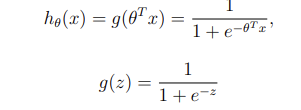
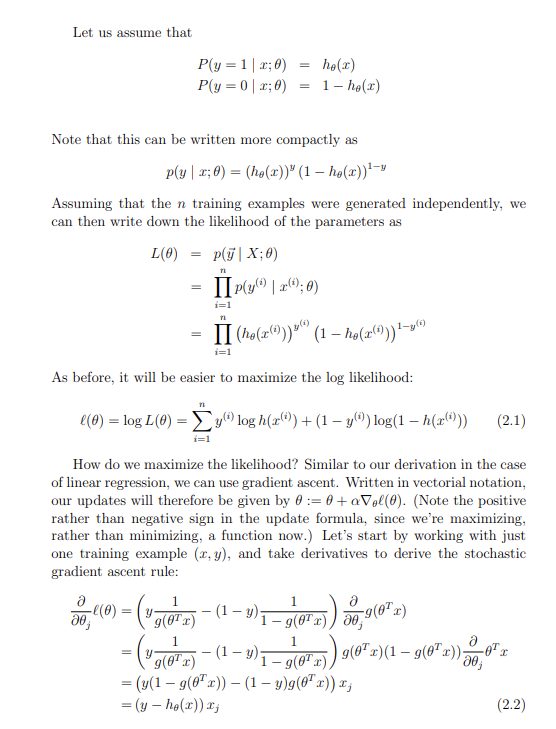

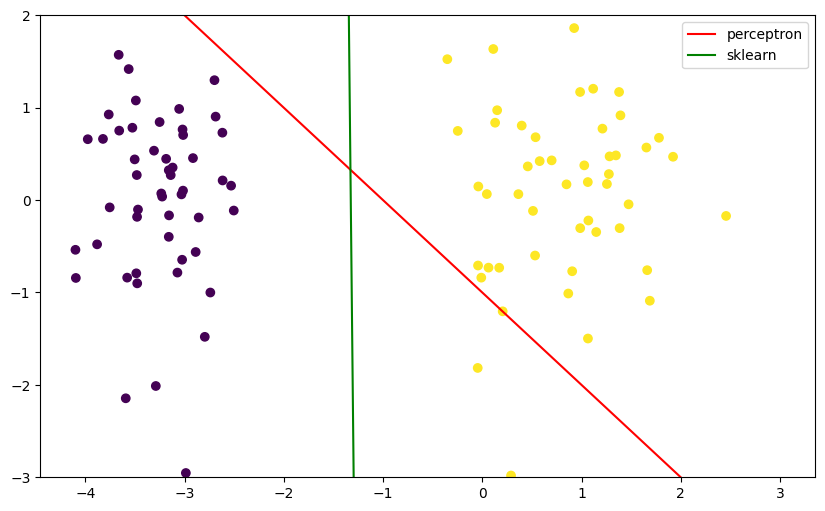

In [1]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y)
# plt.show()
ceofs=None
x_old=x
x=np.insert(x,0,1,axis=1)
coefs=np.ones(x.shape[1])
learning_rate=0.5
for i in range(100):
    idx=np.random.randint(0,100)
    # pred=np.dot(x[idx],coefs)
    pred=1 if np.dot(x[idx],coefs)>0 else 0
    coefs=coefs+learning_rate*(y[idx]-pred)*x[idx]
m=-(coefs[1]/coefs[2])
b=-(coefs[0]/coefs[2])
x_line=np.linspace(-3,3,100)
y_line=m*x_line+b
plt.plot(x_line,y_line,color='r',label='perceptron')
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_old,y)
m=-(model.coef_[0][0]/model.coef_[0][1])
b=-(model.intercept_/model.coef_[0][1])
y_line=m*x_line+b
plt.plot(x_line,y_line,color='g',label='sklearn')
plt.legend()
plt.ylim(-3,2)
plt.show()

2.195477300668974 [2.58695751 0.02387865]
probablity of 1 sample: 99.75492842275729 %
probablity of 2 sample: 1.3597353427832894 %
probablity of 3 sample: 99.1624014509923 %
probablity of 4 sample: 78.94128868607227 %
probablity of 5 sample: 0.1723840148337819 %


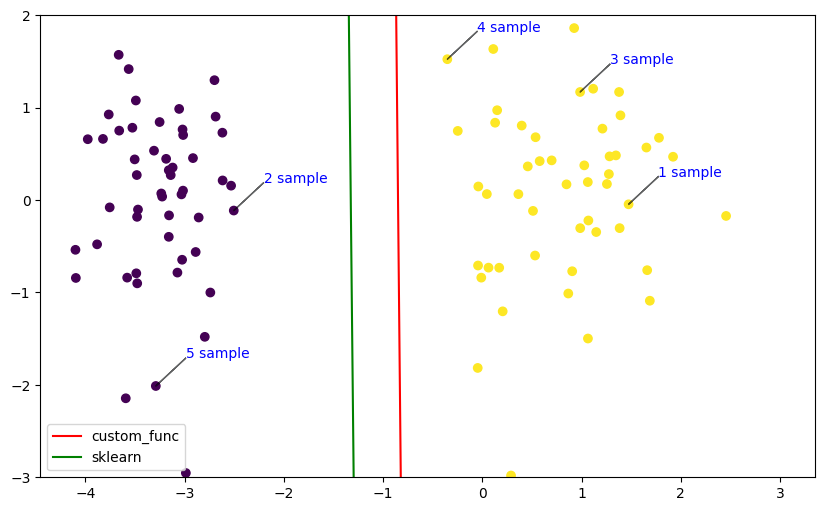

In [2]:
# why the sklearn's method is good?
# we were using step function to use the pred= 0 or 1 
#  use sigmoid funciton to apply on predict and the weight of every shift depends on the distance from the line 
#  rather than step which will give 0 or 1 we get values in range 0 to 1 
def sigmoid(x):return 1/(1+np.exp(-x))
#  now same code with sigmoid without step function
x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=20)
plt.figure(figsize=(10,6))
plt.scatter(x[:,0],x[:,1],c=y)
# plt.show()
ceofs=None
x_old=x
x=np.insert(x,0,1,axis=1)
coefs=np.ones(x.shape[1])
learning_rate=0.5
for i in range(100):
    idx=np.random.randint(0,100)
    # pred=1 if np.dot(x[idx],coefs)>0 else 0
    pred=sigmoid(np.dot(x[idx],coefs))
    coefs=coefs+learning_rate*(y[idx]-pred)*x[idx]
print(coefs[0],coefs[1:])
for i in  range(5):
    idx=np.random.randint(0,100)
    plt.arrow(x[idx][1],x[idx][2],dx=0.3,dy=0.3,alpha=0.6)
    plt.text(x[idx][1]+0.3,x[idx][2]+0.3,'{} sample'.format(i+1),fontsize=10,color='b')
    print("probablity of {} sample:".format(i+1),sigmoid(x[idx].dot(coefs))*100,"%")
m=-(coefs[1]/coefs[2])
b=-(coefs[0]/coefs[2])
x_line=np.linspace(-3,3,100)
y_line=m*x_line+b
plt.plot(x_line,y_line,color='r',label='custom_func')
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_old,y)
m=-(model.coef_[0][0]/model.coef_[0][1])
b=-(model.intercept_/model.coef_[0][1])
y_line=m*x_line+b
plt.plot(x_line,y_line,color='g',label='sklearn')
plt.legend()
plt.ylim(-3,2)
plt.show()

Even then we cannot approach a better solution.

The loss function in case of logistic is the maximmum liklihood.

Cross entropy is the summation of negetive logs of probablities.

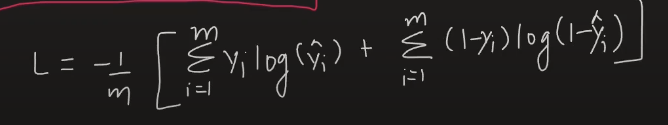

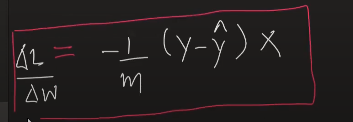

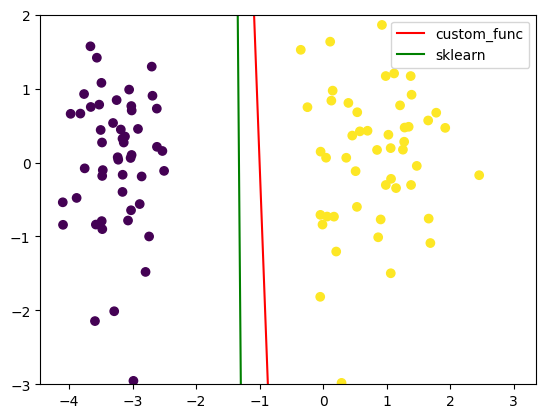

In [3]:
weights=np.ones(x.shape[1])
lr=1
for i in range(100):
    y_hat=sigmoid(np.dot(x,weights))
    weights+=lr*np.dot(y-y_hat,x)/x.shape[0]
m=-(weights[1]/weights[2])
b=-(weights[0]/weights[2])
x_line=np.linspace(-3,3,100)
y_line=m*x_line+b
plt.plot(x_line,y_line,color='r',label='custom_func')
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_old,y)
m=-(model.coef_[0][0]/model.coef_[0][1])
b=-(model.intercept_/model.coef_[0][1])
y_line=m*x_line+b
plt.scatter(x_old[:,0],x_old[:,1],c=y)
plt.plot(x_line,y_line,color='g',label='sklearn')
plt.legend()
plt.ylim(-3,2)
plt.show()

# Classification metrics

**Accuracy scrore:**

number of corrects / number of tests

In [4]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y,model.predict(x_old))*100)

100.0


how can we know which prediction is wrong. 
# Confusion matrix
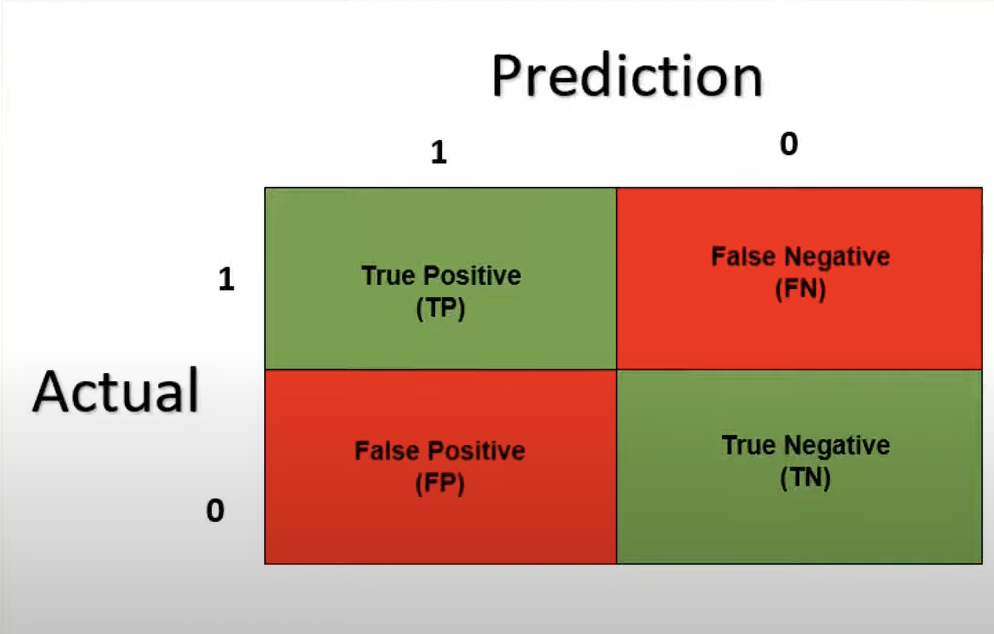

In [6]:
from sklearn.metrics import confusion_matrix
weights=np.ones(x.shape[1])
lr=1
y_hat=sigmoid(np.dot(x,weights))
weights+=lr*np.dot(y-y_hat,x)/x.shape[0]
res=x.dot(weights)
for i in range(len(res)):
    res[i]=0 if res[i]<0 else 1
print(accuracy_score(y,res))
print(confusion_matrix(y,res))

0.98
[[50  0]
 [ 2 48]]


**Type-1 error: The number of false positive**

**Type-2 error:The number of false negetive**

**Precision: Proportion of True positive by predicted(or total) positive.**
true positive / Positive.

**Recall: Proportion of  True positive by  true positive + false negetive**

# F1 score 

F1_score= 2* precision * recall / ( Precision + recall)

like the harmonic mean , its value depends on the lowest value amoing the two.

In [ ]:
from sklearn.metrics import recall_score,f1_score,precision_score

Multiclass classification metrics:

# doubt , ends here 